In [1]:
%matplotlib inline

from numpy import *
from numpy.random import randint as rand
import matplotlib.pyplot as plt

from IPython.display import clear_output
from time import sleep

In [2]:
# Maze generation algorithm from wikipedia

def maze(width=81, height=51, complexity=.75, density=.75):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1]))) # number of components
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2))) # size of components
    # Build actual maze
    Z = zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make aisles
    for i in range(density):
        x, y = rand(0, shape[1] // 2) * 2, rand(0, shape[0] // 2) * 2 # pick a random position
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[rand(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z


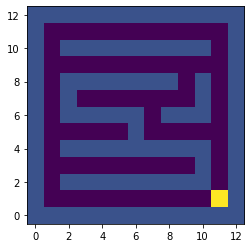

In [3]:
# make a maze, convert array from True/False to integer:
world=array(maze(width=12,height=12),dtype='int')
# 'animate' 
for j in range(12):
    picture=copy(world) # copy the array (!)
    picture[1,j]=4
    plt.imshow(picture,origin='lower')
    plt.show()
    sleep(0.01)
    clear_output(wait=True)

In [4]:
#plt.imshow(maze(width=20, height=20))

In [5]:
import numpy as np
import scipy as scp

In [6]:
class agent:
    
    def __init__(self,maze_env, init_pos):
        
        self.maze_env = maze_env
        #q_shape = np.concatenate(([ 2*len(maze_env.maze_shape)], maze_env.maze_shape))
        q_shape = np.concatenate(([ 2*len(maze_env.maze_shape)], maze_env.maze.shape))
        self.q_functions = np.zeros(shape=q_shape)
        self.position = init_pos
        self.alpha = 0.3
        self.gamma = 0.3
        
    def predict_action(self, random_p=1.):
        """predict action based on position"""
        """sample p and do random walk or walk based on q function"""
        sample_p = np.random.uniform(low=0., high=1.)
        
        if sample_p < random_p:
            """Random walk"""
            action_index = np.random.randint(low=0, high=4, dtype=int)
        else:
            """Q step"""
            #action_index = np.argmax(self.q_functions[:, self.position[0], self.position[1]])
            q_max = np.amax(self.q_functions[:, self.position[0], self.position[1]])
            action_indices = np.argwhere(self.q_functions[:, self.position[0], self.position[1]] == q_max).flatten()
            #print(f"Q action indices {action_indices}")
            action_index = np.random.choice(action_indices)
            #print(f"Q chosen index {action_index}")
            #print(self.q_functions[:, self.position[0], self.position[1]])
            
        return action_index
    
    def update_q(self, action_index, reward):
        """Q update Bellmann equation"""
        #q_new = self.q_functions + self.alpha * ( reward + self.gamma * ( max(self.q_functions) - self.q_functions ) )
        
        q_max = []
        for neigh_i in range(len(self.maze_env.action_list)):
            new_pos = self.position + self.maze_env.action_list[neigh_i]
            #print(new_pos)
            #print(self.maze_env.maze[new_pos[0], new_pos[1]])
            if self.maze_env.maze[new_pos[0], new_pos[1]] == False:
                q_max.append(self.q_functions[neigh_i, new_pos[0], new_pos[1]])
        #print(q_max)
        q_max = np.amax(q_max)
        
        
        q_old = self.q_functions[action_index, self.position[0], self.position[1]]
        self.q_functions[action_index, self.position[0], self.position[1]] = q_old + self.alpha * ( reward + self.gamma * ( q_max - q_old ) )
    
    def update_position(self, action_index):
        action = self.maze_env.action_list[action_index]
        new_pos = self.position + action
        if self.maze_env.maze[new_pos[0], new_pos[1]] == True:
            """Hit wall"""
            pass
        else:
            self.position += action
    
class maze_env:
    
    def __init__(self, width=10, height=10):
        
        self.maze_shape = [width,height]
        self.maze = maze(width=width, height=height)
        
        self.no_walls = np.argwhere( self.maze == False )
        
        indices = list(range(len(self.no_walls)))
        random_index = np.random.choice(indices)
        self.target = self.no_walls[random_index]
        np.delete(self.no_walls, random_index)
        
        self.target_reward = 10.
        self.action_list = [
            [0,1],
            [1,0],
            [0,-1],
            [-1,0]
        ]
    
    def give_reward(self, position):
        
        if np.all(position == self.target):
            return self.target_reward
        else:
            return 0.
    
    def set_agent(self, agent,position):
        agent.position = position

        
    """ position = [x,y]"""
    def set_target(self, position):
        self.target = position
        
        self.target = position
    
    #def get_possible_actions(self, position):
        
    def get_random_pos(self, num_pos):
        #np.random.seed = position
        indices = list(range(len(self.no_walls)))
        print(indices)
        random_index = np.random.choice(indices, size=num_pos, replace=True)
        random_pos = self.no_walls[random_index]
        
        return random_pos
        

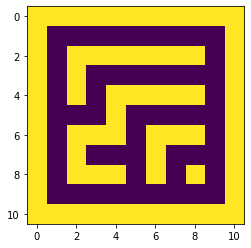

In [7]:
trajectory = []

my_maze_env = maze_env(width=10, height=10)
plt.imshow(my_maze_env.maze)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
[5 2]
[1 9]
(11, 11)


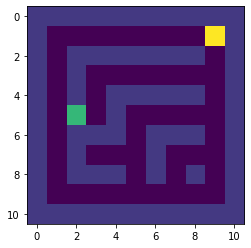

In [ ]:
init_pos = my_maze_env.get_random_pos(1)[0]
my_agent = agent(my_maze_env, init_pos)

#init_pos = my_maze_env.get_random_pos(1)[0]

my_maze_env.set_agent(my_agent,array(init_pos))

image = np.array(my_maze_env.maze, dtype=int)
print(init_pos)
print(my_maze_env.target)
image[init_pos[0], init_pos[1]] = 4
image[my_maze_env.target[0], my_maze_env.target[1]] = 6
print(image.shape)
plt.imshow(image)

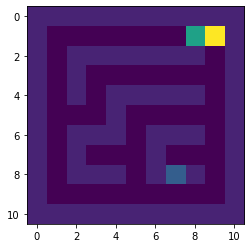

In [ ]:
random_steps = 0
n_steps = 30000
random_p = 0.2
for i in range(n_steps):
    #if i > random_steps:
    #    random_p = 0.2
    
    action_i = my_agent.predict_action(random_p=random_p)
    new_pos = my_agent.position + my_maze_env.action_list[action_i]
    reward = my_maze_env.give_reward(new_pos)
    my_agent.update_q(action_i, reward)
    
    old_pos = my_agent.position
    my_agent.update_position(action_index=action_i)
    new_pos = my_agent.position
    
    image = np.array(my_maze_env.maze, dtype=float)
    if np.all(old_pos == new_pos):
        agent_color = 3
    else:
        agent_color = 7
    image[my_agent.position[0], my_agent.position[1]] = agent_color
    image[my_maze_env.target[0], my_maze_env.target[1]] = 10
    
    q_max_mat = np.amax(my_agent.q_functions, axis=0)
    image += q_max_mat
    #print(q_max_mat)
    
    plt.imshow(image)
    plt.show()
    sleep(0.0001)
    clear_output(wait=True)
    
    if np.all(my_agent.position == my_maze_env.target):
        reset_pos = my_maze_env.get_random_pos(1)[0]
        my_maze_env.set_agent(my_agent, reset_pos)

In [ ]:
q_max_mat = np.amax(my_agent.q_functions, axis=0)
print(q_max_mat)